In [19]:
import numpy as np
import pandas as pd
import recombination as rb
import timeit

n_dims = np.array([2,4,6,10,12,14,16,18,20,25,30,35,40,45,50,55,60,65,70])
sample = 100

n = np.max(n_dims)
factor = np.array([20,50,80,100])
N = max(factor)*(n+1)
N_dims = factor[:,np.newaxis]*n_dims[:,np.newaxis].repeat(len(factor),axis=1).T

print(N_dims[1,:])

# comment/uncomment if you want to try the symmetric/non symmeric case

######################## SYMMETRIC
x = np.random.randn(N,n)
##################################

#################### NON SYMMETRIC
# x = np.random.exponential(1., (N,int(n/2)))
# x = np.append(x,np.random.exponential(5., (N,int(n/2))),axis=1)
# n_dims = np.array([2,4,6,10,12,14,16,18,20,25,30,40,45])
##################################

[ 100  200  300  500  600  700  800  900 1000 1250 1500 1750 2000 2250
 2500 2750 3000 3250 3500]


In [21]:
mean_t = 0.

time_rand = np.zeros((len(factor),len(n_dims),sample))
iterations_rand = np.zeros((len(factor),len(n_dims),sample))

min_t = np.zeros((len(factor),len(n_dims)))
max_t = np.zeros((len(factor),len(n_dims)))

for j in range(len(factor)):
    
    for k in range(len(n_dims)):    

        for i in range(sample):

            tic = timeit.default_timer()
            rb.recomb_Mor_reset(
                            x[:N_dims[j,k],:n_dims[k]]-np.mean(x[:N_dims[j,k],:n_dims[k]],0), n_dims[k]**3)
            
            time_rand[j,k,i] = (timeit.default_timer()-tic)*1000

            mean_t += time_rand[j,k,i]
            print("sample = ", i)
            print("time = ", time_rand[j,k,i], "ms")
            print("mean time = ", mean_t/(i+1), "ms")

        mean_t = 0.
    
mean_t = np.mean(time_rand,2)
min_t = np.min(time_rand,2)
max_t = np.max(time_rand,2)

print("---------------------------------------")
print("max t = ", max_t, "ms")
print("min t = ", min_t, "ms")
print("mean = ", mean_t/sample, "ms")
print("---------------------------------------")

sample =  0
time =  0.6785589998798969 ms
mean time =  0.6785589998798969 ms
sample =  1
time =  0.8169599998382182 ms
mean time =  0.7477594998590575 ms
sample =  2
time =  0.696573000141143 ms
mean time =  0.7306973332864194 ms
sample =  3
time =  0.5397550000907358 ms
mean time =  0.6829617499874985 ms
sample =  4
time =  0.5102630000237696 ms
mean time =  0.6484219999947527 ms
sample =  5
time =  1.2809459999516548 ms
mean time =  0.7538426666542364 ms
sample =  6
time =  0.6294979998529016 ms
mean time =  0.7360791428254743 ms
sample =  7
time =  0.4746249999243446 ms
mean time =  0.703397374962833 ms
sample =  8
time =  0.48044699997262796 ms
mean time =  0.6786251110750325 ms
sample =  9
time =  0.5931890000283602 ms
mean time =  0.6700814999703653 ms
sample =  10
time =  0.4945830000906426 ms
mean time =  0.6541270908903905 ms
sample =  11
time =  0.46662499994454265 ms
mean time =  0.6385019166449032 ms
sample =  12
time =  0.5388740000853431 ms
mean time =  0.6308382307557062

In [22]:
from Maalouf_Jubran_Feldman import Fast_Caratheodory

sample_FC = 20
time_FC = np.zeros((len(factor),len(n_dims),sample_FC))

for j in range(len(factor)):
    for k in range(len(n_dims)):
        for i in range(sample_FC):
            tic = timeit.default_timer()
            Fast_Caratheodory(x[:N_dims[j,k],:n_dims[k]],np.ones(N_dims[j,k]),n_dims[k]+1)
            time_FC[j,k,i] = (timeit.default_timer()-tic)*1000

print("mean FC = ", np.mean(time_FC,2), " ms")
print("std FC = ", np.std(time_FC,2))

mean FC =  [[  1.99864935   3.3112656    4.7128956    7.2241251    8.7913564
   11.04521515  13.1512279   15.3728227   17.25933325  25.9546336
   38.6974507   60.77395375  76.8459102  104.15918965 133.4497538
  160.84614325 195.5568698  254.2631063  303.376311  ]
 [  2.24804305   3.831706     5.5168333    9.6296536   11.37357555
   14.00716785  16.09796435  19.4621538   22.93821005  36.42958935
   52.4936219   82.23019165 104.241773   141.47148705 176.11212255
  218.5234461  282.0429461  347.82552195 402.22733985]
 [  2.4080308    3.8916991    5.8927691   10.57158235  12.63927155
   15.4144856   17.88744745  21.75458035  25.3619801   38.6848926
   58.68722435  90.83519495 115.7810188  156.50461945 195.5456518
  242.4310766  296.20559275 379.4161465  445.596192  ]
 [  2.60682835   4.27823815   6.0759561   11.0788969   13.8335308
   16.62603045  18.81717705  23.33813055  27.2826954   41.23577735
   64.18865175  97.668081   123.5199232  167.6683566  212.2667566
  265.88322815 315.71551545

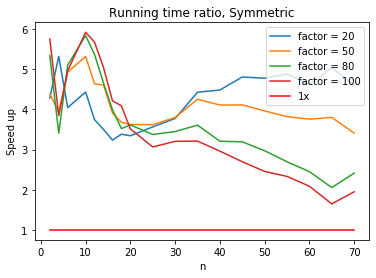

In [25]:
import matplotlib.pyplot as plt

for i in range(len(factor)):
    plt.plot(n_dims,np.mean(time_FC[i],1)/np.mean(time_rand[i],1), label = 'factor = '+str(factor[i]))
plt.plot(n_dims, np.ones(len(n_dims)),color="red", label = "1x")
plt.legend()
plt.xlabel('n')
plt.ylabel('Speed up')
plt.title("Running time ratio, Symmetric")
# plt.savefig('Synthetic_factor_study_vsn.pdf', bbox_inches='tight')
plt.show()
